Importing Libraries

In [1]:
# DataFrame
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

In [2]:
# Styling
%matplotlib inline
from termcolor import colored, cprint
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "cursive"

# Cluster & Visualization
from sklearn.cluster import KMeans
#from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [3]:
#!pip install catboost

In [4]:
# Models
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Preprocessing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

In [5]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
# Reading data
df = pd.read_csv('Stores.csv')

In [7]:
df.head()

Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620

In [8]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# Let's drop "Store ID" feature, because we won't use it
df = df.drop('Store ID ',axis=1)

In [11]:
df.head()

Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0        1659             1961                   530        66490
1        1461             1752                   210        39820
2        1340             1609                   720        54010
3        1451             1748                   620        53730
4        1770             2111                   450        46620

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [13]:
df.describe()

Store_Area  Items_Available  Daily_Customer_Count    Store_Sales
count   896.000000       896.000000            896.000000     896.000000
mean   1485.409598      1782.035714            786.350446   59351.305804
std     250.237011       299.872053            265.389281   17190.741895
min     775.000000       932.000000             10.000000   14920.000000
25%    1316.750000      1575.500000            600.000000   46530.000000
50%    1477.000000      1773.500000            780.000000   58605.000000
75%    1653.500000      1982.750000            970.000000   71872.500000
max    2229.000000      2667.000000           1560.000000  116320.000000

In [14]:
# Let's see top 5 stores with highest sales

highest_sales = pd.DataFrame(df.nlargest(5, ['Store_Sales']))
highest_sales

Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
649        1989             2414                   860       116320
868        1775             2104                   980       105150
432        1365             1638                   680       102920
408        1303             1587                  1310       102310
758        1486             1758                   820       101820

In [15]:
# show the top 5 stores with lowest sales

lowest_sales = pd.DataFrame(df.nsmallest(5, ['Store_Sales']))
lowest_sales

Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
31         1250             1508                   990        14920
852        1477             1790                   880        16370
775        1537             1877                   660        17670
593        1624             1946                   870        20270
352        1397             1686                   850        21300

EDA

<AxesSubplot:>

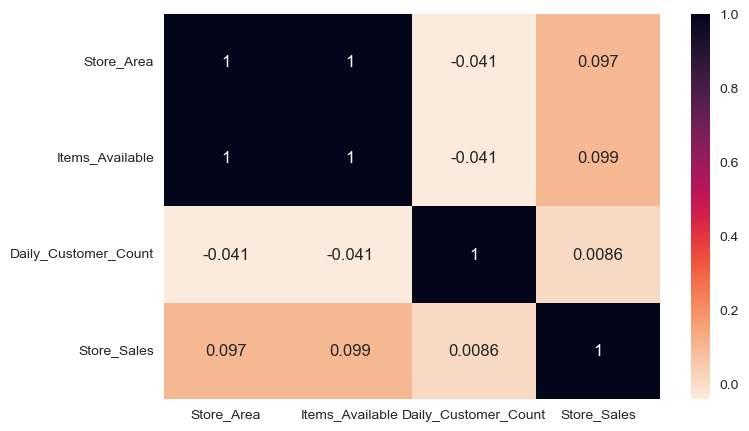

In [16]:
# Let's see the correlation between variables

plt.figure(figsize = (8, 5))
sns.heatmap(df.corr(), annot = True, cmap = 'rocket_r')

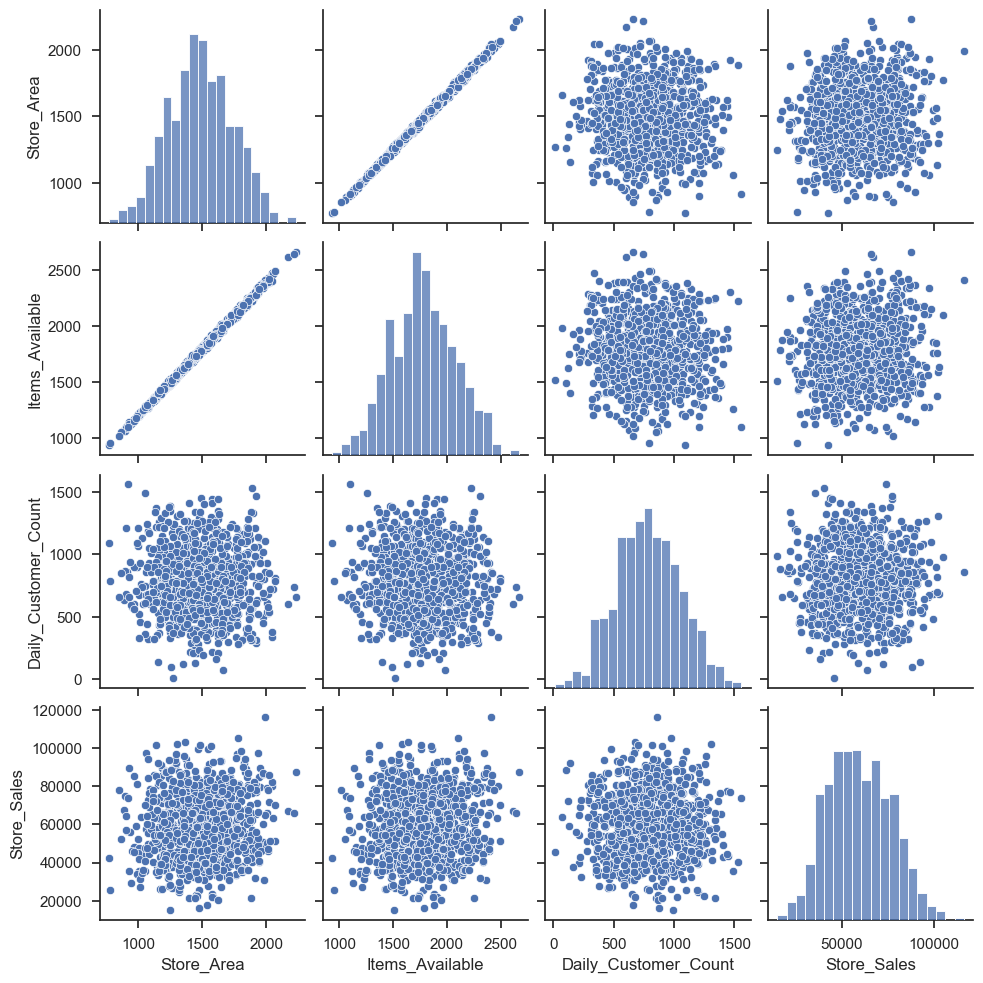

In [17]:
sns.set_theme(style="ticks",palette='deep')
sns.pairplot(df)

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Store_Area', ylabel='Density'>

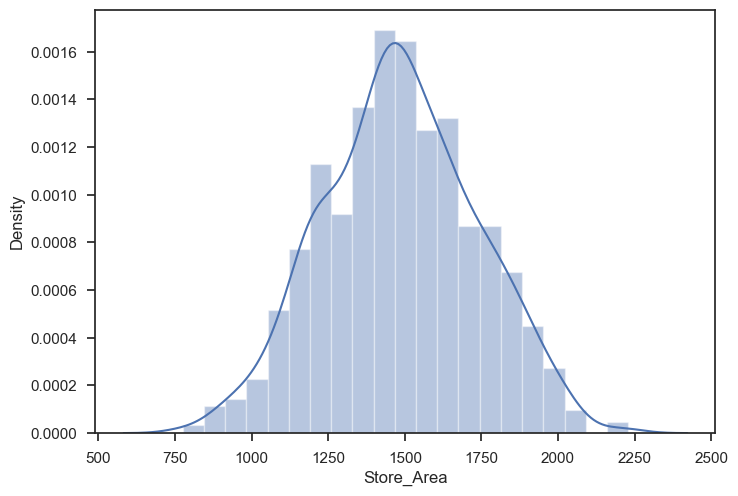

In [18]:
sns.color_palette("rocket")
sns.distplot(df['Store_Area'])

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Items_Available', ylabel='Density'>

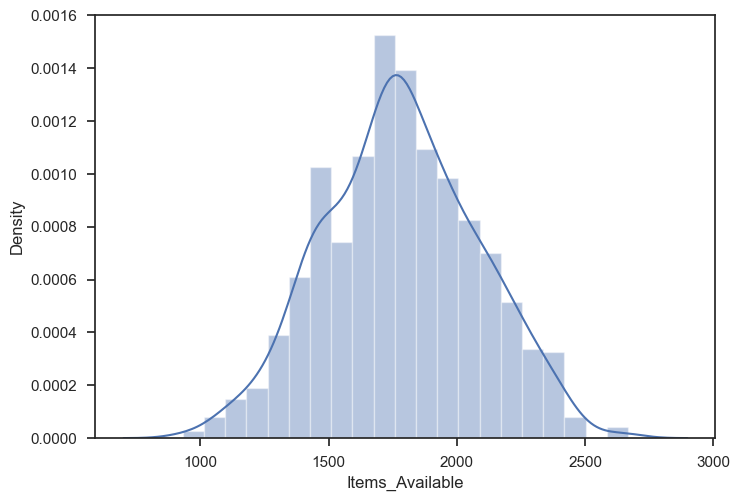

In [19]:
sns.distplot(df['Items_Available'])

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily_Customer_Count', ylabel='Density'>

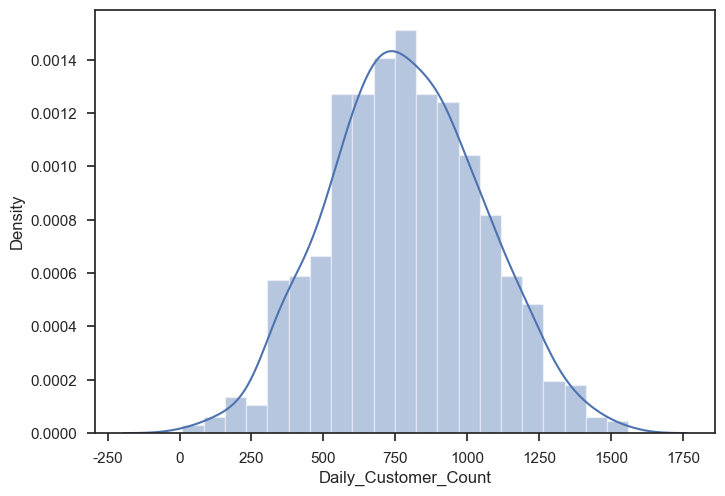

In [20]:
sns.distplot(df['Daily_Customer_Count'])

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Store_Sales', ylabel='Density'>

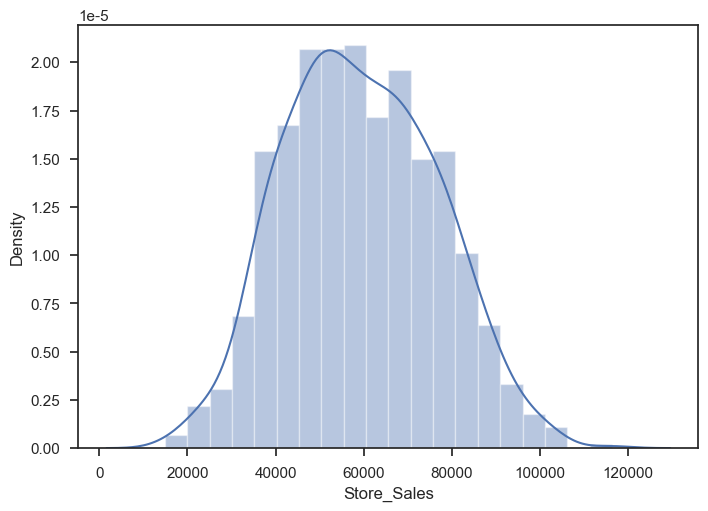

In [21]:
sns.distplot(df['Store_Sales'])

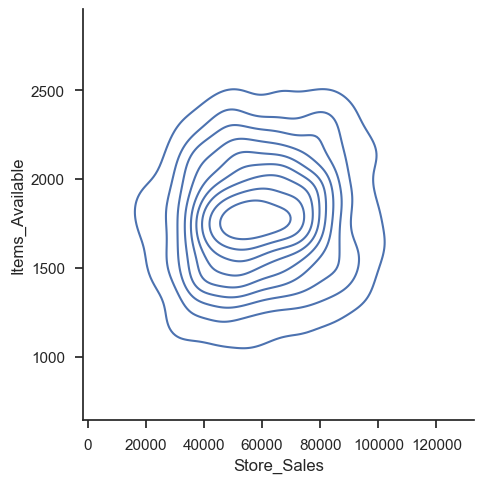

In [22]:
sns.displot(
    df, x="Store_Sales", y="Items_Available",
    kind="kde"
)

In [23]:
columns = df.columns.tolist()

fig = go.Figure()
fig.add_trace(go.Box(y=df[columns[0]], name=columns[0],
                marker_color = '#1589FF'))
fig.add_trace(go.Box(y=df[columns[1]], name = columns[1],
                marker_color = '#659EC7'))
fig.add_trace(go.Box(y=df[columns[2]], name = columns[2],
                marker_color = '#00BFFF'))

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"),
    template='simple_white',
    title = 'Features (BoxPlot)')
fig.show()

In [24]:
fig = go.Figure()
fig.add_trace(go.Box(y=df[columns[3]], name=columns[3],
                marker_color = '#B0CFDE'))

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"),
    template='simple_white',
    title = 'Target Column (BoxPlot)')
fig.show()

We noticed that there are outliers!

Feature Engineering

Remove outliers from features

In [25]:
columns = df.columns.tolist()

# To remove outliers in features
def remove_outliers(column):
    idx = []
    Q1 = np.percentile(column, 25, interpolation = 'midpoint')
    Q3 = np.percentile(column, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(column >= (Q3+1.5*IQR))
    lower = np.where(column <= (Q1-1.5*IQR))
    column = column.drop(upper[0])
    column = column.drop(lower[0])
    return column

In [26]:
# To merge dataframe with series
def create_new_dataframe(dataframe):
    lst = []
    columns = df.columns.tolist()[:-1]
    for column in columns:
        lst.append(remove_outliers(df[column]))
    return pd.concat(lst,axis=1).dropna()

In [27]:
df  = pd.concat([create_new_dataframe(df),df['Store_Sales']], axis=1).dropna().reset_index().drop('index',axis=1)

df.tail()

Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
883      1582.0           1910.0                1080.0        66390
884      1387.0           1663.0                 850.0        82080
885      1200.0           1436.0                1060.0        76440
886      1299.0           1560.0                 770.0        96610
887      1174.0           1429.0                1110.0        54340

In [28]:
# Check if there are another outliers
fig = go.Figure()
fig.add_trace(go.Box(y=df[columns[0]], name=columns[0],
                marker_color = '#1589FF'))
fig.add_trace(go.Box(y=df[columns[1]], name = columns[1],
                marker_color = '#659EC7'))
fig.add_trace(go.Box(y=df[columns[2]], name = columns[2],
                marker_color = '#00BFFF'))

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"),
    template='simple_white',
    title = 'Features (BoxPlot)')
fig.show()

Now, There is no outliers!

Data Preprocessing

In [29]:
y = df['Store_Sales']
X = df.drop('Store_Sales',axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [31]:
sc = StandardScaler()
X = sc.fit_transform(X)

Modeling before clustering

Random Forest Regressor

In [32]:
rfr = RandomForestRegressor(bootstrap = True, max_depth = 90, max_features = 2, min_samples_leaf = 4, min_samples_split = 12, n_estimators = 100)
rfr.fit(X_train, y_train)
r_pred = rfr.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, r_pred)
rmse = np.sqrt(mean_squared_error(y_test, r_pred))
mae = mean_absolute_error(y_test, r_pred)

score = rfr.score(X_train, y_train) 
scores = cross_val_score(rfr, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(rfr, X_train, y_train, cv=kfold )

In [34]:
print('RandomForest Regressor')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

RandomForest Regressor
MSE: 331292807.56
RMSE: 18201.45
MAE: 15348.44
Training score:  0.4257532417522497
Mean cross-validation score: -0.05
K-fold CV average score: -0.07


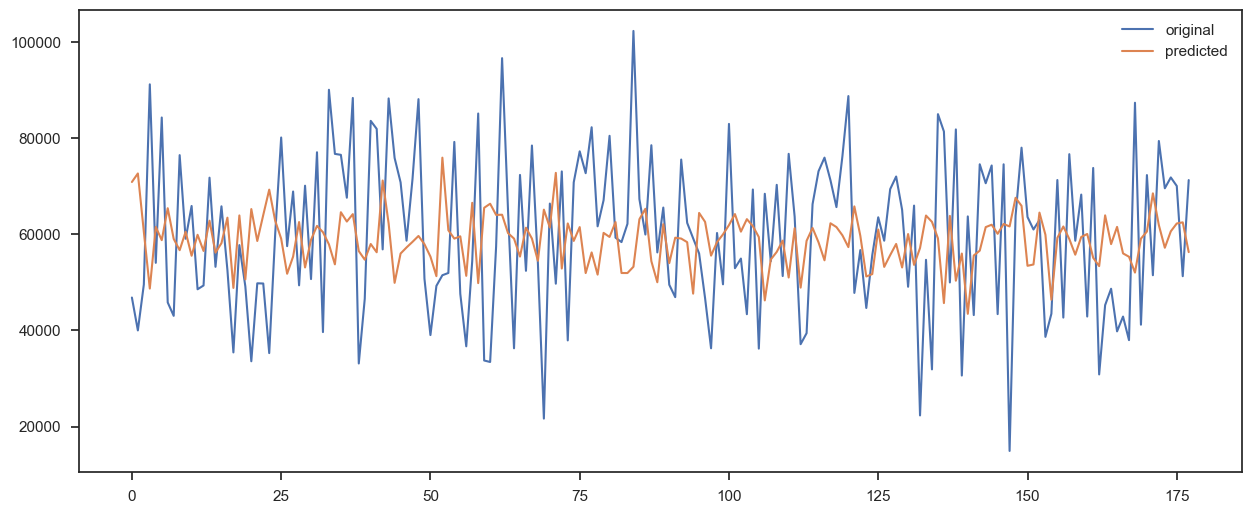

In [35]:
plt.figure(figsize = (15, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, r_pred, label="predicted")
plt.legend()
plt.show()

Data Mining

In [36]:
sales_data_avgs = df.copy()
sales_data_avgs.head()

Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0      1659.0           1961.0                 530.0        66490
1      1461.0           1752.0                 210.0        39820
2      1340.0           1609.0                 720.0        54010
3      1451.0           1748.0                 620.0        53730
4      1770.0           2111.0                 450.0        46620

In [37]:
sales_data_avgs['ratio_items/cutomers'] = sales_data_avgs['Items_Available']/sales_data_avgs['Daily_Customer_Count']
sales_data_avgs['ratio_size/customers'] = sales_data_avgs['Store_Area']/sales_data_avgs['Daily_Customer_Count']
sales_data_avgs['ratio_size/items']     = sales_data_avgs['Store_Area']/sales_data_avgs['Items_Available']
sales_data_avgs['target_sales'] = df['Store_Sales']

In [38]:
sales_data_avgs.drop(['Store_Area','Items_Available','Daily_Customer_Count','Store_Sales'],axis = 1, inplace = True)
sales_data_avgs.head()

ratio_items/cutomers  ratio_size/customers  ratio_size/items  target_sales
0              3.700000              3.130189          0.845997         66490
1              8.342857              6.957143          0.833904         39820
2              2.234722              1.861111          0.832815         54010
3              2.819355              2.340323          0.830092         53730
4              4.691111              3.933333          0.838465         46620

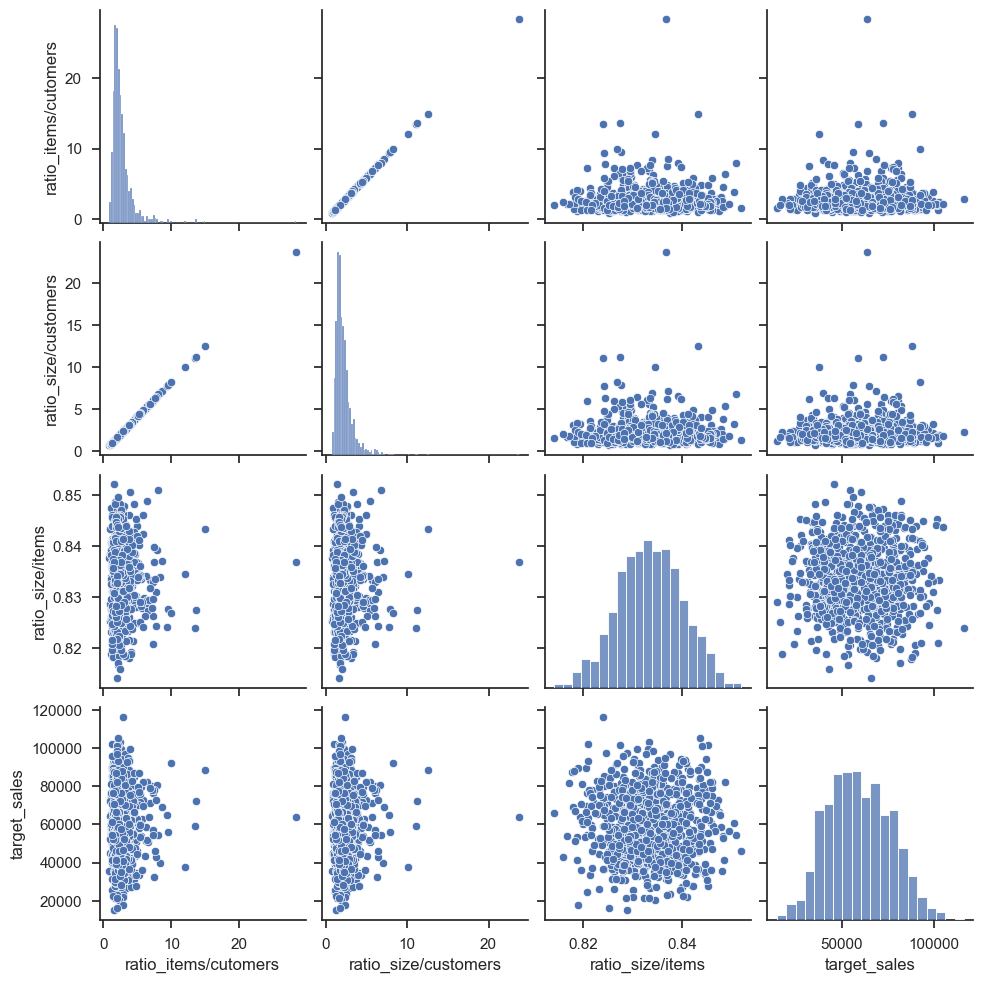

In [39]:
sns.pairplot(data = sales_data_avgs)

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



Text(0, 0.5, 'Inertia')

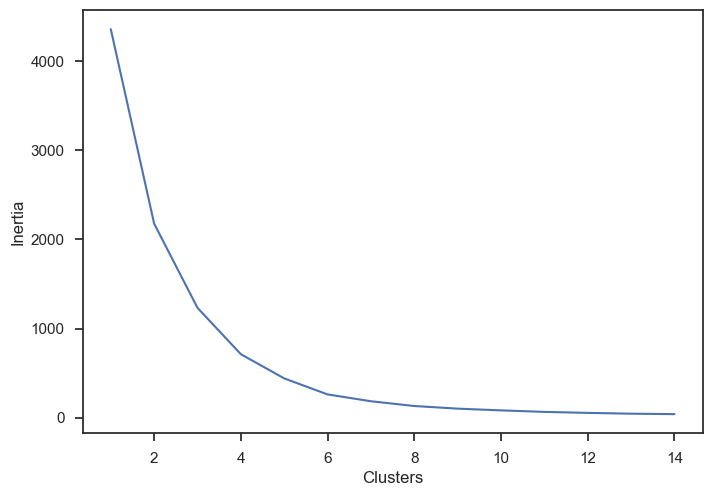

In [40]:
x= sales_data_avgs.drop('target_sales',axis= 1)
clusters = []

for i in range(1, 15):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)
    
sns.lineplot(x=list(range(1, 15)), y=clusters)
plt.xlabel('Clusters')
plt.ylabel('Inertia')

We learned from the graph above, that the data can be grouped into 10 different groups to classify it for purchasing power of customers

In [41]:
km_10 = KMeans(n_clusters=10).fit(X)
x['Labels'] =km_10.labels_
x.head()

ratio_items/cutomers  ratio_size/customers  ratio_size/items  Labels
0              3.700000              3.130189          0.845997       7
1              8.342857              6.957143          0.833904       4
2              2.234722              1.861111          0.832815       2
3              2.819355              2.340323          0.830092       1
4              4.691111              3.933333          0.838465       0

In [42]:
y = sales_data_avgs['target_sales']

Creating group for target sales based on labels

In [43]:
sales_join = x.join(y)
sales_join.columns

Index(['ratio_items/cutomers', 'ratio_size/customers', 'ratio_size/items',
       'Labels', 'target_sales'],
      dtype='object')

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



Text(0, 0.5, 'Inertia')

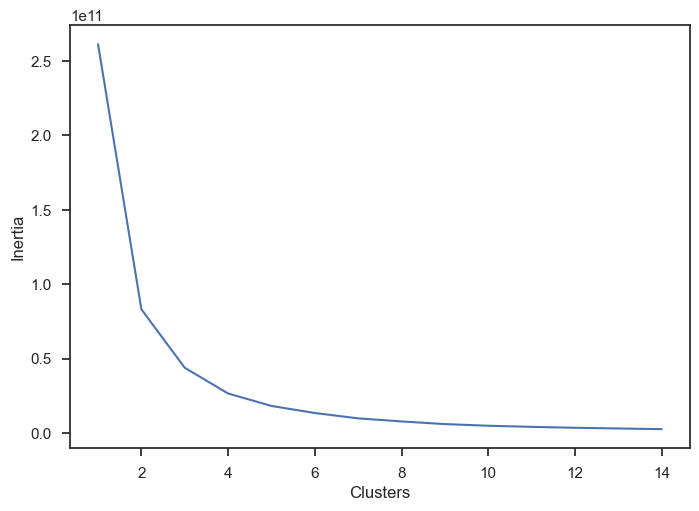

In [44]:
sales_x = sales_join[['Labels','target_sales']]

x1= sales_x
clusters = []

for i in range(1, 15):
    km = KMeans(n_clusters=i).fit(x1)
    clusters.append(km.inertia_)
    
sns.lineplot(x=list(range(1, 15)), y=clusters)
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [45]:
km_10 = KMeans(n_clusters=10).fit(x1)
x['Target_Groups'] =km_10.labels_
x.head()

ratio_items/cutomers  ratio_size/customers  ratio_size/items  Labels  \
0              3.700000              3.130189          0.845997       7   
1              8.342857              6.957143          0.833904       4   
2              2.234722              1.861111          0.832815       2   
3              2.819355              2.340323          0.830092       1   
4              4.691111              3.933333          0.838465       0   

   Target_Groups  
0              7  
1              4  
2              6  
3              6  
4              1

Modeling after clustering

[1] Used 6 models with 10 FOLD cross validation for model comparison:

LinearRegression,
DecisionTreeRegressor,
XGBRegressor,
LGBMRegressor,
CatBoostRegressor,
RandomForestRegressor

[2] Used StandardScaler() for scaling.

[3] Evaluation metrics: mae, mse, rmse, R2_score



In [46]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

1-Linear Regression

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred =lr.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
mae = mean_absolute_error(y_test, lr_pred)

score = lr.score(X_train, y_train) 
scores = cross_val_score(lr, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(lr, X_train, y_train, cv=kfold )
r2 =r2_score(y_test,  lr_pred)

In [49]:
print('Linear Regression')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print("R_score : %.2f"%(r2))

Linear Regression
MSE: 273871287.91
RMSE: 16549.06
MAE: 13770.81
Training score:  0.011849014634712107
Mean cross-validation score: -0.01
K-fold CV average score: -0.01
R_score : -0.01


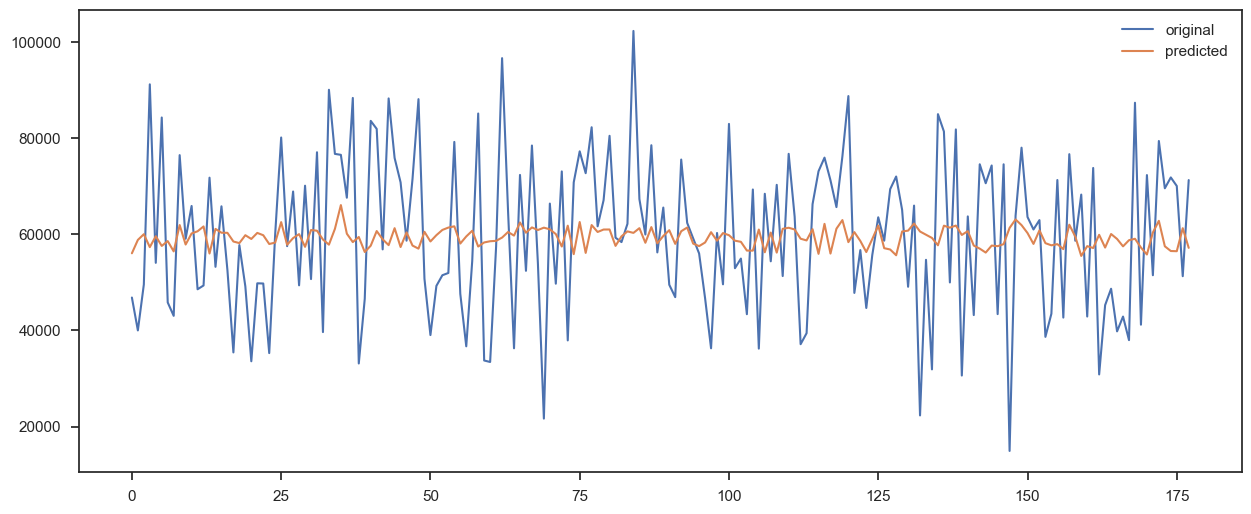

In [50]:
plt.figure(figsize = (15, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, lr_pred, label="predicted")
plt.legend()
plt.show()

2-Decision Tree Regressor

In [51]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred =dtr.predict(X_test)

In [52]:
mse = mean_squared_error(y_test, dtr_pred)
rmse = np.sqrt(mean_squared_error(y_test, dtr_pred))
mae = mean_absolute_error(y_test, dtr_pred)

score = dtr.score(X_train, y_train) 
scores = cross_val_score(dtr, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(dtr, X_train, y_train, cv=kfold )
r2 =r2_score(y_test,  dtr_pred)

In [53]:
print('DecisionTree Regressor')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print("R_score : %.2f"%(r2))

DecisionTree Regressor
MSE: 10956601.69
RMSE: 3310.08
MAE: 2562.64
Training score:  1.0
Mean cross-validation score: 0.96
K-fold CV average score: 0.96
R_score : 0.96


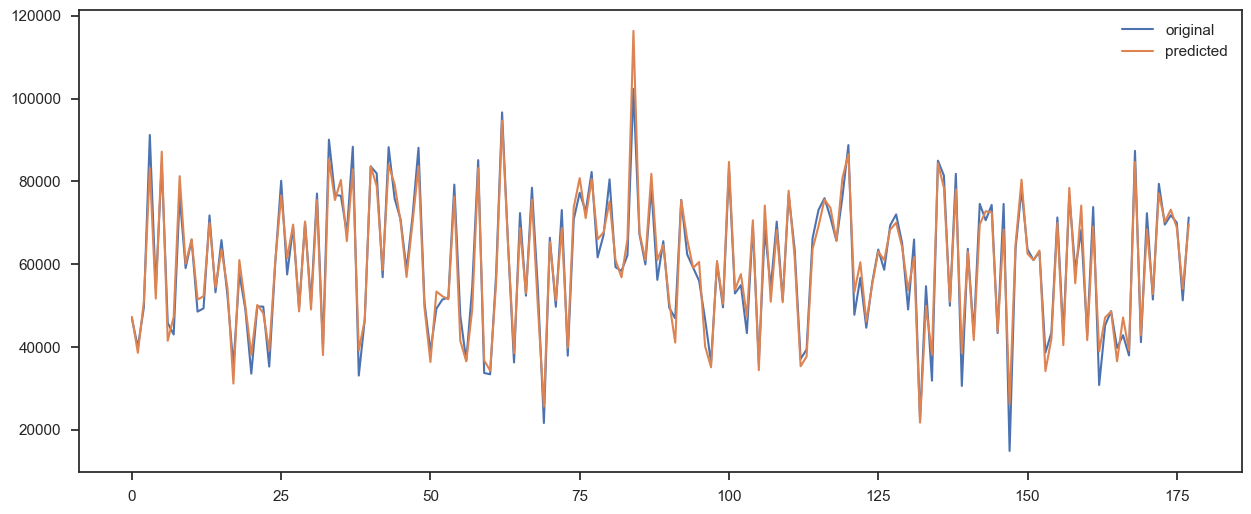

In [54]:
plt.figure(figsize = (15, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, dtr_pred, label="predicted")
plt.legend()
plt.show()

3-XGB Regressor

In [55]:
xgbr = XGBRegressor(random_state = 116)
xgbr.fit(X_train, y_train)
xgbr_pred =xgbr.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, xgbr_pred)
rmse = np.sqrt(mean_squared_error(y_test, xgbr_pred))
mae = mean_absolute_error(y_test, xgbr_pred)

score = xgbr.score(X_train, y_train) 
scores = cross_val_score(xgbr, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
r2 =r2_score(y_test,  xgbr_pred)

In [57]:
print('XGB Regressor')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print("R_score : %.2f"%(r2))

XGB Regressor
MSE: 8802600.89
RMSE: 2966.92
MAE: 2257.44
Training score:  0.9997547059075895
Mean cross-validation score: 0.97
K-fold CV average score: 0.97
R_score : 0.97


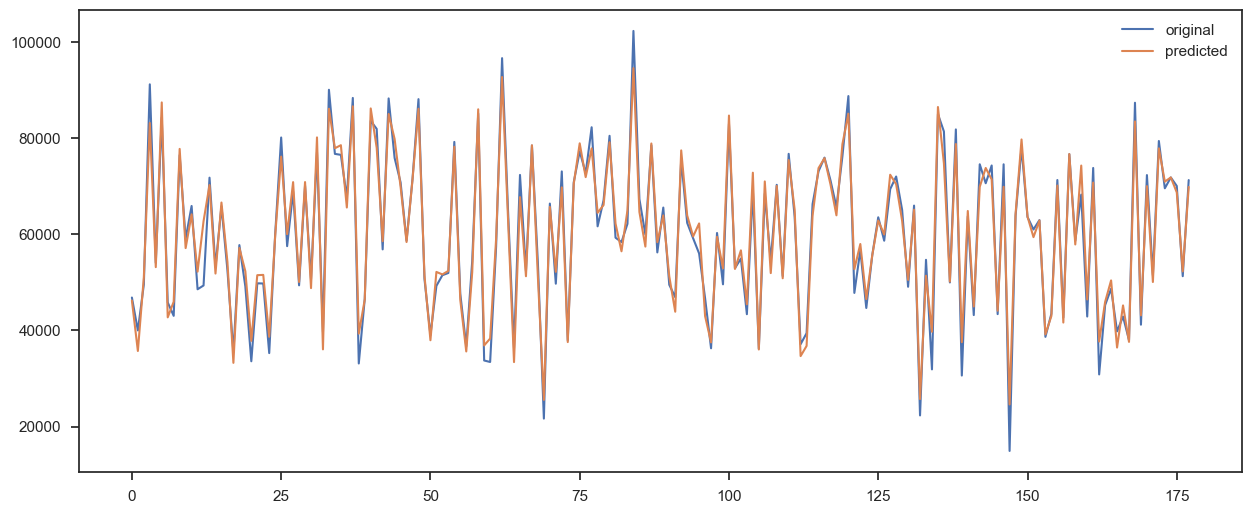

In [58]:
plt.figure(figsize = (15, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, xgbr_pred, label="predicted")
plt.legend()
plt.show()

4-LGBM Regressor

In [59]:
lgbr = lgb.LGBMRegressor(random_state = 116)
lgbr.fit(X_train, y_train)
lgbr_pred =lgbr.predict(X_test)

In [60]:
mse = mean_squared_error(y_test, lgbr_pred)
rmse = np.sqrt(mean_squared_error(y_test, lgbr_pred))
mae = mean_absolute_error(y_test, lgbr_pred)

score = lgbr.score(X_train, y_train) 
scores = cross_val_score(lgbr, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(lgbr, X_train, y_train, cv=kfold )
r2 =r2_score(y_test,  lgbr_pred)

In [61]:
print('LGBM Regressor')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print("R_score : %.2f"%(r2))

LGBM Regressor
MSE: 6985213.81
RMSE: 2642.96
MAE: 2078.07
Training score:  0.9925421086334488
Mean cross-validation score: 0.95
K-fold CV average score: 0.95
R_score : 0.97


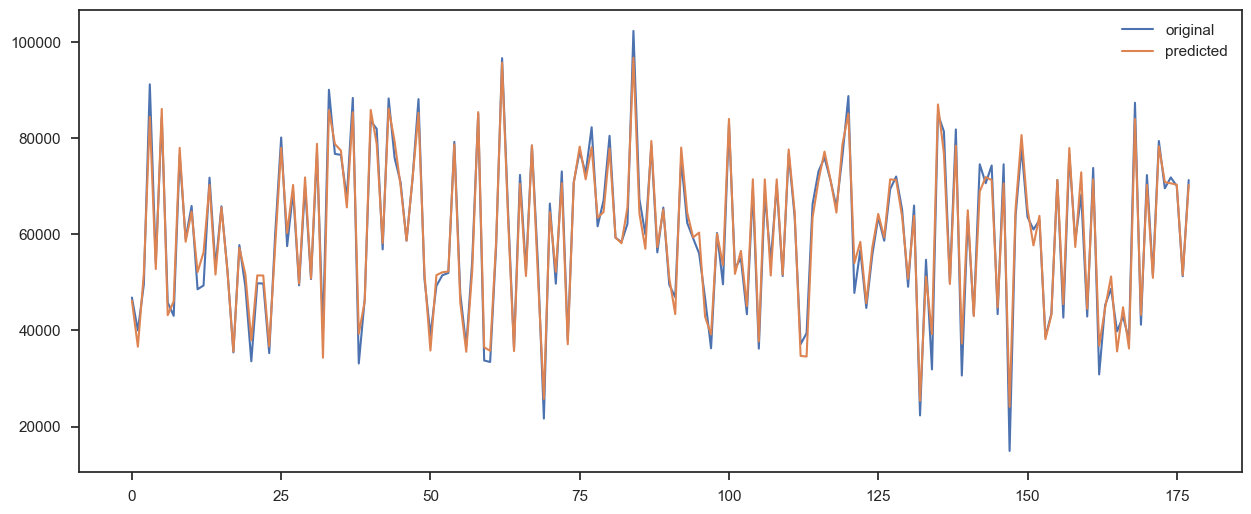

In [62]:
plt.figure(figsize = (15, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, lgbr_pred, label="predicted")
plt.legend()
plt.show()

5-CatBoost Regressor

In [63]:
cbr = CatBoostRegressor(random_state =116, verbose = 0)
cbr.fit(X_train, y_train)
cbr_pred =cbr.predict(X_test)

In [64]:
mse = mean_squared_error(y_test, cbr_pred)
rmse = np.sqrt(mean_squared_error(y_test, cbr_pred))
mae = mean_absolute_error(y_test, cbr_pred)

score = cbr.score(X_train, y_train) 
scores = cross_val_score(cbr, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(cbr, X_train, y_train, cv=kfold )
r2 =r2_score(y_test,  cbr_pred)

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aravi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aravi\anaconda3\lib\site-packages\catboost\core.py", line 5703, in fit
    return self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline,
  File "C:\Users\aravi\anaconda3\lib\site-packages\catboost\core.py", line 2319, in _fit
   

In [65]:
print('CatBoost Regressor')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print("R_score : %.2f"%(r2))

CatBoost Regressor
MSE: 7580666.54
RMSE: 2753.30
MAE: 2194.73
Training score:  0.994799794134466
Mean cross-validation score: nan
K-fold CV average score: 0.98
R_score : 0.97


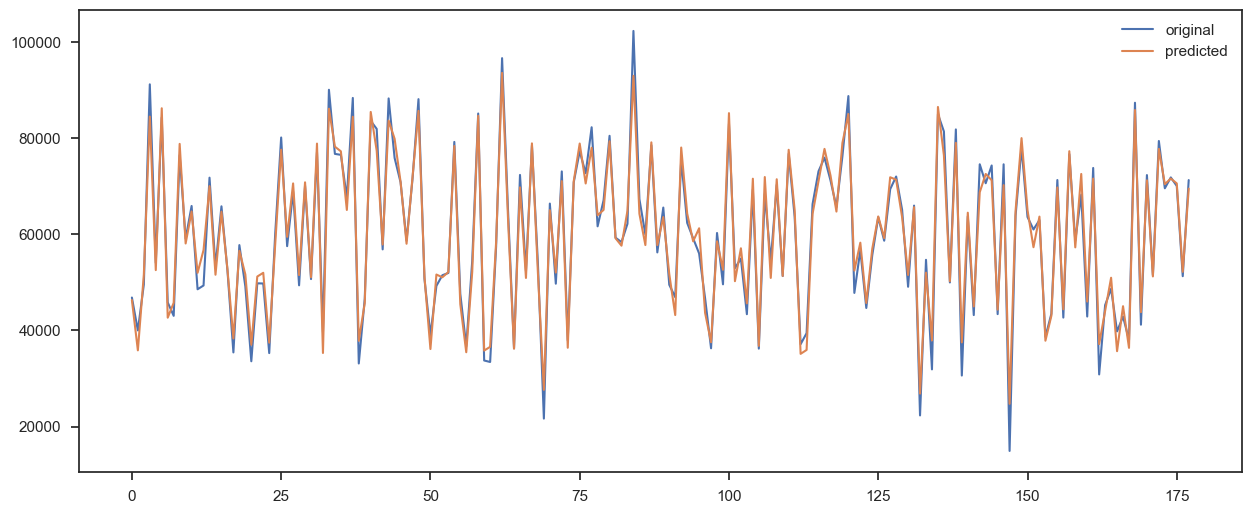

In [66]:
plt.figure(figsize = (15, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, cbr_pred, label="predicted")
plt.legend()
plt.show()

6-Random Forest Regressor

In [67]:
rf = RandomForestRegressor(random_state = 116)
rf.fit(X_train, y_train)
rf_pred =rf.predict(X_test)

In [68]:
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
mae = mean_absolute_error(y_test, rf_pred)

score = rf.score(X_train, y_train) 
scores = cross_val_score(rf, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(rf, X_train, y_train, cv=kfold )
r2 =r2_score(y_test,  rf_pred)

In [69]:
print('Random Forest Regressor')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print("R_score : %.2f"%(r2))

Random Forest Regressor
MSE: 6064883.64
RMSE: 2462.70
MAE: 1968.15
Training score:  0.9965974885128529
Mean cross-validation score: 0.98
K-fold CV average score: 0.98
R_score : 0.98


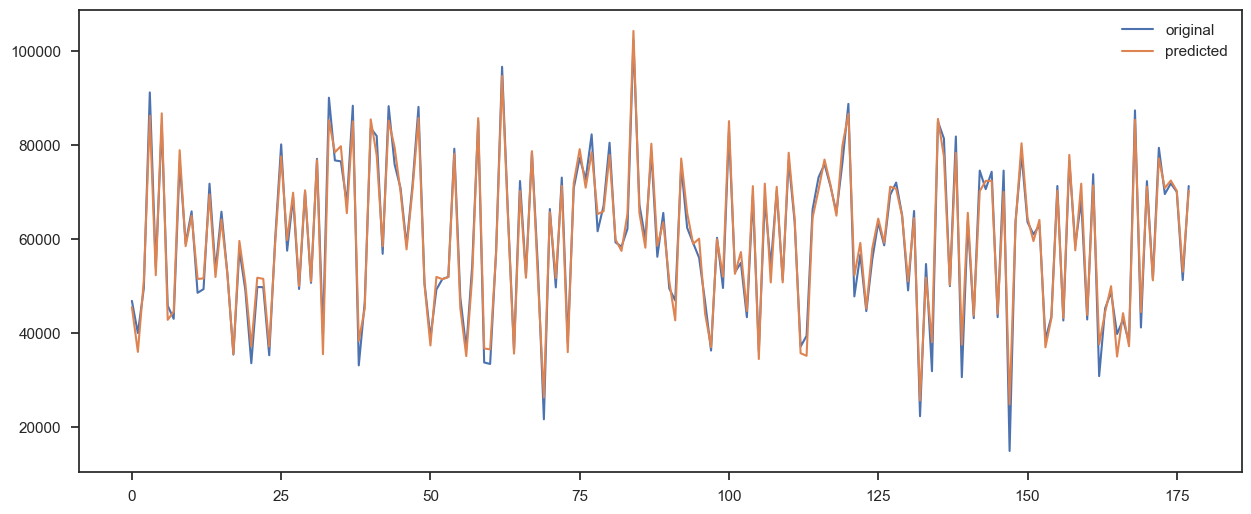

In [70]:
plt.figure(figsize = (15, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, rf_pred, label="predicted")
plt.legend()
plt.show()

In [71]:
# parameters
class PARAM:
    FOLD = 10
    RANDOM_STATE = 116
    VERBOSE = 0
    
# scaling function
def Scaler(train_X, val_X):
    scaler = StandardScaler()
    scaled_train = scaler.fit_transform(train_X)
    scaled_val = scaler.transform(val_X)
    return scaled_train, scaled_val

# define models
xgbr = XGBRegressor(random_state = PARAM.RANDOM_STATE)
lgbr = lgb.LGBMRegressor(random_state = PARAM.RANDOM_STATE)
cbr = CatBoostRegressor(random_state = PARAM.RANDOM_STATE, verbose = PARAM.VERBOSE)
rf = RandomForestRegressor(random_state = PARAM.RANDOM_STATE)
dtr = DecisionTreeRegressor()
lr = LinearRegression()
classifiers_name = ['XGBRegressor','LGBMRegressor','CatBoostRegressor','RandomForestRegressor','DecisionTreeRegressor','LinearRegression']
color_sequence = ['red','blue','green','grey','cyan','yellow']
classifiers = [xgbr, lgbr, cbr, rf, dtr, lr]
mae_score = []
mse_score = []
rmse_score = []
R2_score = []

fold = KFold(n_splits=PARAM.FOLD, shuffle=True, random_state=PARAM.FOLD)

# 10 fold
for idx, classifier in enumerate(classifiers):
    mae = 0  
    mse = 0
    rmse = 0
    r2score = 0
    print(colored('Classifier:',color_sequence[idx]) ,colored(classifiers_name[idx],color_sequence[idx]), '\n\n')
    for fold_idx, (train_idx, val_idx) in enumerate(fold.split(X, y)):
                
        x_train, x_val = x.iloc[train_idx], x.iloc[val_idx]
        x_train, x_val = Scaler(x_train, x_val)
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        model = classifier.fit(x_train, y_train)
        val_preds = model.predict(x_val)
        
       
        mae += mean_absolute_error(y_val, val_preds) / PARAM.FOLD
        mse += mean_squared_error(y_val,val_preds) / PARAM.FOLD
        rmse += np.sqrt(mean_squared_error(y_val, val_preds)) / PARAM.FOLD
        r2score += r2_score(y_val,val_preds)/PARAM.FOLD
        print('Fold','{',fold_idx+1,'} ','\n\n')
        print('MAE Score: ', mean_absolute_error(y_val, val_preds))
        print('MSE Score: ', mean_squared_error(y_val,val_preds))
        print('RMSE Score: ', np.sqrt(mean_squared_error(y_val, val_preds)))
        print('R2 Score: ', r2_score(y_val,val_preds),'\n\n')

        
    mae_score.append(round(mae,2))
    mse_score.append(round(mse,2))
    rmse_score.append(round(rmse,2))
    R2_score.append(round(r2score,2))
    print('---'*20,'\n')

Classifier: XGBRegressor 


Fold { 1 }  


MAE Score:  2379.545251053371
MSE Score:  8249873.612715989
RMSE Score:  2872.2593219826076
R2 Score:  0.969645463050923 


Fold { 2 }  


MAE Score:  2032.4973665730338
MSE Score:  7406393.221237011
RMSE Score:  2721.468945484591
R2 Score:  0.9727024899364146 


Fold { 3 }  


MAE Score:  2189.3003204002807
MSE Score:  7683650.230360695
RMSE Score:  2771.9397955873237
R2 Score:  0.9721755249061022 


Fold { 4 }  


MAE Score:  2280.605775983146
MSE Score:  7625896.980683144
RMSE Score:  2761.5026671511914
R2 Score:  0.9735345492606063 


Fold { 5 }  


MAE Score:  2372.255749648876
MSE Score:  12328576.690141484
RMSE Score:  3511.2072980872954
R2 Score:  0.9638601174956826 


Fold { 6 }  


MAE Score:  1981.7601386938202
MSE Score:  6139244.401922504
RMSE Score:  2477.7498666981105
R2 Score:  0.9812000508951546 


Fold { 7 }  


MAE Score:  2164.2498024929773
MSE Score:  7075435.327234461
RMSE Score:  2659.969046292543
R2 Score:  0.9787891842

Model Comparison

Compare R2 Score of 5 regression models below:

In [72]:
fig = px.bar(x = classifiers_name,
             y = R2_score,
             text = R2_score,
             template = "simple_white",
             color = classifiers_name,
             color_discrete_sequence = px.colors.qualitative.Antique)

fig.update_layout(template = 'simple_white', title = 'R2 Score Comparison')

fig.update_layout(
    xaxis_title="Models",
    yaxis_title="R2_Score",
    font = dict(size=17, family = 'Franklin Gothic'))


fig.data[2].marker.line.width = 3
fig.data[2].marker.line.color='black'
    
fig.show()

Our 'CatBoostRegressor' and 'RandomForeset' model got the highest R2_Score.

And RMSE Score Comparison:

In [73]:
fig = px.line(x = classifiers_name,
             y = rmse_score,
             text = rmse_score,
             template = "simple_white",)

fig.update_layout(template = 'simple_white', title = 'RMSE Score Comparison')

fig.update_layout(
    xaxis_title="Models",
    yaxis_title="RMSE_Score",
    font = dict(size=17, family = 'Franklin Gothic'))

fig.show()